In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics Vidya\ALL THE PYNB FILES OF THE COMPLETE COURSE\train (1).csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.shape

(8523, 12)

In [4]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# data.drop(['Item_Identifier'], axis = 1)
# fig, ax = plt.subplots(figsize = (12,12))
# ax = sns.heatmap(data.corr(),annot = True)

## Analysis of Continuous variables

In [6]:
conti_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
print(len(conti_feature))

5


In [7]:
# for feature in conti_feature:  #analyzed the conti variable by creating histograms to understand there distribution
#     data1 = data.copy()
#     data[feature].hist(bins=25)
#     plt.xlabel(feature)
#     plt.ylabel('count')
#     plt.title(feature)
#     plt.show()

In [8]:
# for feature in conti_feature:  #analyzed presence of outlier in conti by creating boxplot to understand there distribution
#     data1 = data.copy()
#     data[feature].plot.box()
#     plt.title(feature)
#     plt.show()

## Analysis of Categorical Variable

In [9]:
cate_feature = [feature for feature in data.columns if (data[feature].dtypes == 'O')]
print(len(cate_feature))
data[cate_feature].head()

7


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


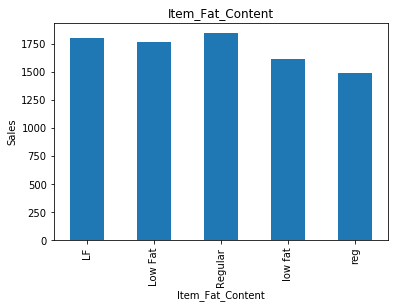

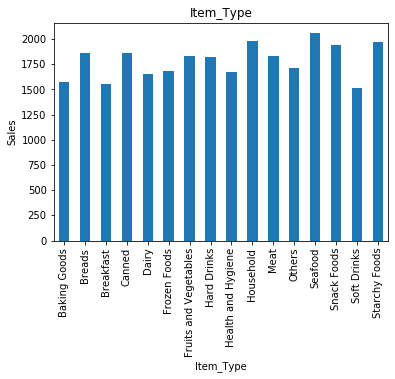

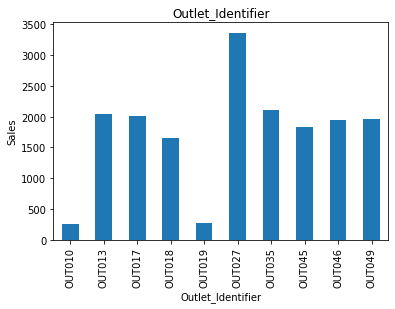

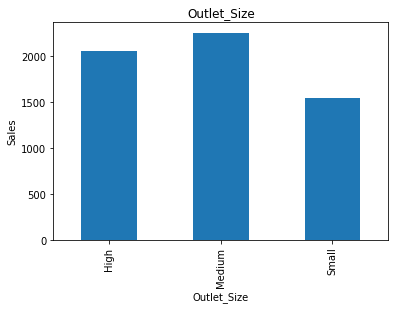

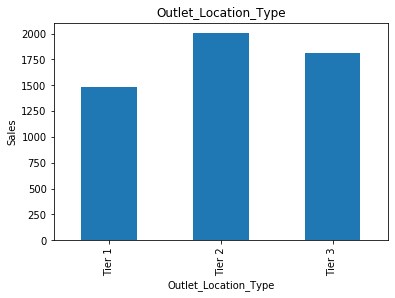

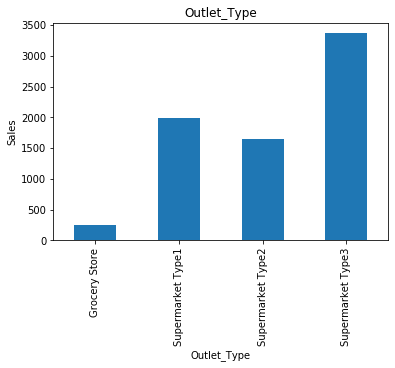

In [10]:
for feature in cate_feature:
    data1 = data.copy()
    if feature in 'Item_Identifier':
        pass
    else:
        data1.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Sales')
        plt.title(feature)
        plt.show()

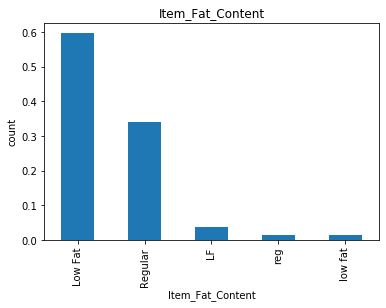

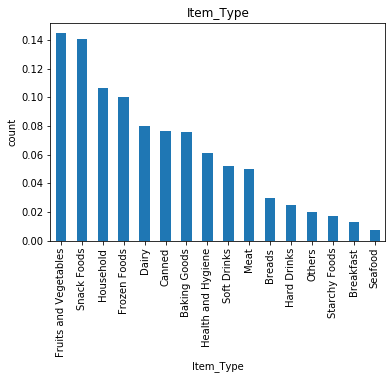

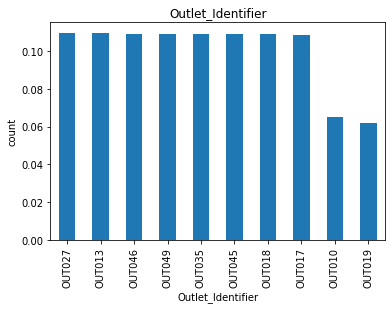

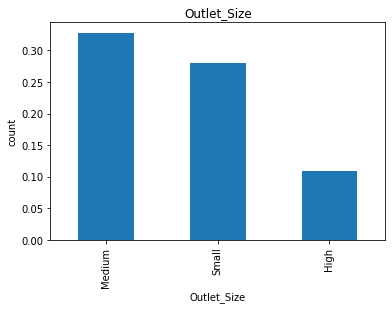

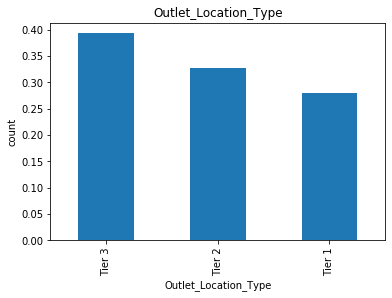

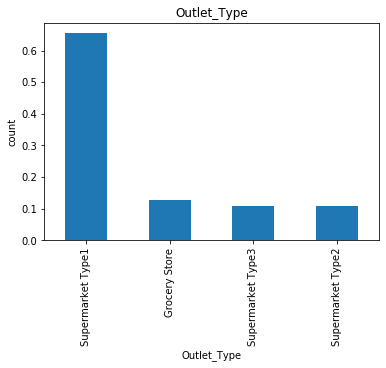

In [11]:
for feature in cate_feature:
    data1 = data.copy()
    if feature in 'Item_Identifier':
        pass
    else:
        (data1[feature].value_counts()/len(data1)).plot.bar()
        plt.xlabel(feature)
        plt.ylabel('count')
        plt.title(feature)
        plt.show()

## Analysis of missing value

In [12]:
feature_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1]
print(len(feature_nan)) #seeing missing value of both conti+categ features (complete dataset)
data[feature_nan].head()

2


,Item_Weight,Outlet_Size
0,9.30,Medium
1,5.92,Medium
2,17.50,Medium
3,19.20,NaN
4,8.93,High


In [13]:
# for feature in feature_nan: #since there are many missing value, so lets c if they have any relation with item outlet sales
#     data1 = data.copy()
#     data1[feature] = np.where(data[feature].isnull(),1,0)
#     data1.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
#     plt.title(feature)
#     plt.show()

# DATA MANIPULATION

## Check for Duplicate values

In [14]:
data.duplicated().any()  #are there any DUPLICATE values in the complete dataset

False

## Check for missing value - of continuous and categorical variable separetely & filling it

#### Working with missing value in continuous variable and imputing it

In [15]:
data[conti_feature].head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700


In [16]:
conti_feature_nan = [feature for feature in conti_feature if data[feature].isnull().sum()>0]
print('no. of continuous feature with missing value',len(conti_feature_nan))
print('no of missing value in that continuous feature is {}'.format(data[conti_feature_nan].isnull().sum()))

no. of continuous feature with missing value 1
no of missing value in that continuous feature is Item_Weight    1463
dtype: int64


In [17]:
data[conti_feature_nan].head(2)

,Item_Weight
0,9.30
1,5.92


In [18]:
for feature in conti_feature_nan: #filled the missing value with mean and printed the result, n again chcked for missing vlu
    data[feature] = data[feature].fillna(data[feature].mean())
print(data[conti_feature_nan].head(2))
print(data[conti_feature_nan].isnull().sum())

   Item_Weight
0         9.30
1         5.92
Item_Weight    0
dtype: int64


#### Working with missing value in categorical variable and imputing it

In [19]:
data[cate_feature].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [20]:
cate_feature_nan = [feature for feature in cate_feature if data[feature].isnull().sum()>0]
print('no of categorical feature with missing value',len(cate_feature_nan))
print('no of missing value in that categorical feature is {}'.format(data[cate_feature_nan].isnull().sum()))

no of categorical feature with missing value 1
no of missing value in that categorical feature is Outlet_Size    2410
dtype: int64


In [21]:
data[cate_feature_nan].head(2)

,Outlet_Size
0,Medium
1,Medium


In [22]:
for feature in cate_feature_nan: #just filled all missing cate. variable with term as 'Missing'
    data[feature] = data[feature].fillna('Missing')
data[cate_feature_nan].head(5)

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,Missing
4,High


In [23]:
data[cate_feature_nan].isnull().sum()  #hence now no missing value in this column 

Outlet_Size    0
dtype: int64

## Working with continuous variable

In [24]:
data[conti_feature].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


### 1. skewness to symmetrical using log, square root and cube root transformation (variable transformation)

In [25]:
# for feature in conti_feature:        #using logarithmeic transformation on conti feature 
#     data1 = data.copy()
#     if 0 in data1[feature].unique():
#         pass
#     else:
#         data1[feature] = np.log(data1[feature]).hist()
#         plt.xlabel(feature)
#         plt.ylabel('Item_Outlet_Sales')
#         plt.title(feature)
#         plt.show()

In [26]:
# for feature in conti_feature:                             # variable transformation - square root
#     data1 = data.copy()                                     
#     data1[feature] = np.sqrt(data1[feature]).hist()
#     plt.xlabel(feature)
#     plt.ylabel('Item_Outlet_Sales')
#     plt.title(feature)
#     plt.show()

In [27]:
# for feature in conti_feature:                        #variable transformation - cube root
#     data1 = data.copy()
#     data1[feature] = np.power(data1[feature],1/3).hist()
#     plt.xlabel(feature)
#     plt.ylabel('Item_outlet_sales')
#     plt.title(feature)
#     plt.show()

In [28]:
# for feature in conti_feature:        #we have selected sqrt root transformation as our variable transformation 
#     data1 = data.copy()                  #since it gives more symmetric results
#     data1[feature] = np.sqrt(data1[feature])
#     data1['Item_Outlet_Sales'] = np.sqrt(data1['Item_Outlet_Sales'])
#     plt.scatter(data1[feature],data1['Item_Outlet_Sales'])
#     plt.xlabel(feature)
#     plt.ylabel('Item_Outelt_Sales')
#     plt.title(feature)
#     plt.show()

In [29]:
data[conti_feature].head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


### 2. outliers

In [30]:
data[conti_feature].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


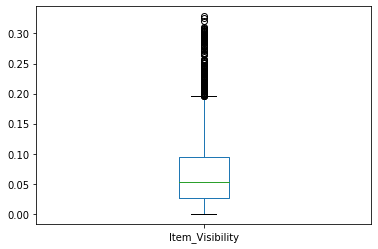

In [31]:
data['Item_Visibility'].plot.box()  #just for checking purpose

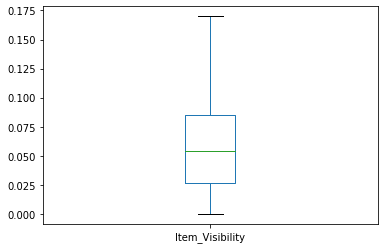

In [32]:
data.loc[data['Item_Visibility']>0.17,'Item_Visibility'] = np.mean(data['Item_Visibility'])
data['Item_Visibility'].plot.box()

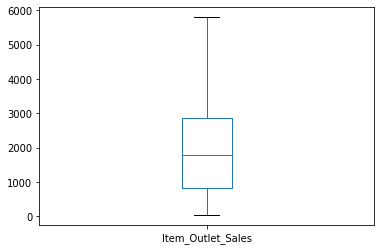

In [33]:
data.loc[data['Item_Outlet_Sales']>5800,'Item_Outlet_Sales'] = np.mean(data['Item_Outlet_Sales'])
data['Item_Outlet_Sales'].plot.box()

## Working with categorical variable

In [34]:
data[cate_feature].head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Missing,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [35]:
for col in data[cate_feature].columns:              #in order to check that how many labels each categorical feature has 
    print(col ,':' ,len(data[col].unique()),'labels')        #data[col] give us the values inside the dataset col. by col.

Item_Identifier : 1559 labels
Item_Fat_Content : 5 labels
Item_Type : 16 labels
Outlet_Identifier : 10 labels
Outlet_Size : 4 labels
Outlet_Location_Type : 3 labels
Outlet_Type : 4 labels


##### use count/frequency encoding in 'Item Identifier' col since it has large unique values which couldn't be handled that well by label encoding(as it is more useful for those categories which has lesser no. of labels). Dont use get_dummies cz it will increse our column nos. alot and if the column no. (feature) gets increases then it will disturb the dimensionality of the model leading to a bad accuracy. We could also use COMBINE SPARSE CLASS TECHNIQUE which I be writiing that after this codes as a comment(combine sparse class does the same thing by counting the label no. in a feature but it also removes those labels from a column which contributes 0.01% less to the dataset

#### Count/Frequency encoding technique - Technique 1

In [36]:
# let's obtain the counts for each one of the labels in Item_Identifier(since it really has lots of unique values)
# let's capture this in a dictionary that we can use to re-map the labels
data['Item_Identifier'].value_counts().to_dict()  

{'FDW13': 10,
 'FDG33': 10,
 'NCY18': 9,
 'NCB18': 9,
 'FDW26': 9,
 'FDX04': 9,
 'NCI54': 9,
 'FDF56': 9,
 'FDW49': 9,
 'FDV38': 9,
 'NCJ30': 9,
 'FDO19': 9,
 'DRN47': 9,
 'FDD38': 9,
 'FDG09': 9,
 'FDQ40': 9,
 'DRE49': 9,
 'NCF42': 9,
 'FDF52': 9,
 'FDU12': 9,
 'NCL31': 9,
 'FDP25': 9,
 'FDX31': 9,
 'FDV60': 9,
 'NCQ06': 9,
 'FDT07': 9,
 'FDX20': 9,
 'FDA50': 8,
 'FDT32': 8,
 'DRA59': 8,
 'NCC18': 8,
 'NCK53': 8,
 'NCP05': 8,
 'FDL58': 8,
 'FDR44': 8,
 'FDK58': 8,
 'DRI03': 8,
 'NCM07': 8,
 'FDS52': 8,
 'FDT24': 8,
 'FDA39': 8,
 'FDV26': 8,
 'FDW24': 8,
 'DRJ24': 8,
 'FDT49': 8,
 'NCX05': 8,
 'FDZ20': 8,
 'FDS55': 8,
 'FDX45': 8,
 'FDR52': 8,
 'FDY03': 8,
 'FDA44': 8,
 'NCX29': 8,
 'NCQ43': 8,
 'FDO10': 8,
 'DRK12': 8,
 'FDT40': 8,
 'NCE31': 8,
 'NCS53': 8,
 'FDI22': 8,
 'NCV06': 8,
 'FDX50': 8,
 'FDR46': 8,
 'NCO54': 8,
 'FDG57': 8,
 'FDH33': 8,
 'FDL34': 8,
 'NCK29': 8,
 'FDB17': 8,
 'FDF04': 8,
 'FDR59': 8,
 'FDA04': 8,
 'DRF03': 8,
 'FDQ39': 8,
 'FDL20': 8,
 'FDF16': 8,
 'FDO32': 

In [37]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
data_frequency_map = data['Item_Identifier'].value_counts().to_dict()

In [38]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [39]:
# and now we replace 'Item_Identifier' feature in the dataset data
data['Item_Identifier'] = data['Item_Identifier'].map(data_frequency_map)

In [40]:
data['Item_Identifier'].head()

0    8
1    6
2    7
3    6
4    6
Name: Item_Identifier, dtype: int64

In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,8,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,6,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,7,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,6,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,6,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##### Also we can use combine sparse class whereever the nunique is very large - Technique 2

In [42]:
# data['Item_Identifier'].nunique()  #has many unique values(high cardinality index),
# #so use combine sparse class method for this feature

In [43]:
# temp= data['Item_Identifier'].value_counts()
# temp.head()

In [44]:
# data['Item_Identifier_count'] = data['Item_Identifier'].apply(lambda x: temp[x]) # a new col. will be created too
# data[['Item_Identifier','Item_Identifier_count']].head()

In [45]:
# #every item identifier which has less than 4 count of item identifer will be label as 'other', these are the sparse classes,
# # as they have lesser counts
# for i in range(0, len(data)):         
#     if data['Item_Identifier_count'][i] < 4:
#         data['Item_Identifier'][i] = 'other'

In [46]:
# data['Item_Identifier'].value_counts()

In [47]:
# data = data.drop(['Item_Identifier'],axis=1)

##### apply labelencoding to rest all the categorical feature

In [48]:
data[cate_feature].head(5)   

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,8,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,6,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,7,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,6,Regular,Fruits and Vegetables,OUT010,Missing,Tier 3,Grocery Store
4,6,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [51]:
le.fit_transform(['Tier 1','Tier 2','Tier 3'])

array([0, 1, 2], dtype=int64)

In [52]:
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 2':2, 'Tier 3':3})

In [53]:
data['Outlet_Location_Type'].head()

0    1
1    3
2    1
3    3
4    3
Name: Outlet_Location_Type, dtype: int64

In [54]:
data[cate_feature].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,8,Low Fat,Dairy,OUT049,Medium,1,Supermarket Type1
1,6,Regular,Soft Drinks,OUT018,Medium,3,Supermarket Type2
2,7,Low Fat,Meat,OUT049,Medium,1,Supermarket Type1
3,6,Regular,Fruits and Vegetables,OUT010,Missing,3,Grocery Store
4,6,Low Fat,Household,OUT013,High,3,Supermarket Type1


In [55]:
data['Item_Identifier'] = le.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = le.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])
data['Outlet_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [56]:
data[cate_feature].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,7,1,4,9,1,1,0
1,5,2,14,3,1,3,2
2,6,1,10,9,1,1,0
3,5,2,6,0,2,3,2
4,5,1,9,1,0,3,2


#### Handling rare categorical variable

In [57]:
# for feature in cate_feature: - BUT WE WONT HANDLE RARE VARIAVLE BCZ ITENDIFIIER WILL ALL GET RARE, SO AVAOID
#     temp = data.groupby(feature)['Item_Outlet_Sales'].count()/len(data)
#     temp_df = temp[temp>0.01].index
#     data[feature] = np.where(data[feature].isin(temp_df),data[feature],'Rare_var')

In [58]:
# data[cate_feature].head() 

### Feature Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.777778,0.282525,0.25,0.094427,0.266667,0.927507,1.000000,0.583333,0.333333,0.0,0.0,0.642181
1,0.555556,0.081274,0.50,0.113439,0.933333,0.072068,0.333333,1.000000,0.333333,1.0,1.0,0.071148
2,0.666667,0.770765,0.25,0.098622,0.666667,0.468288,1.000000,0.583333,0.333333,0.0,0.0,0.358050
3,0.555556,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,0.666667,1.0,1.0,0.121275
4,0.555556,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.000000,1.0,1.0,0.166782


## Apply various models.. knn, linear regression, decision tree,random forest and ensemble 

## KNN

#### 1. Segregate variables independent and dependent variables

In [61]:
X = data.drop(['Item_Outlet_Sales'],axis=1)
y = data['Item_Outlet_Sales']
X.shape, y.shape

((8523, 11), (8523,))

#### 2. Import train test split function 

In [62]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,random_state = 56)

#### 3. Implement KNN Regresson(since it is a regression problem) 

##### Applying mse evaluation metrics

In [129]:
from sklearn.neighbors import KNeighborsRegressor as KNN #for importing the regressor
from sklearn.metrics import mean_squared_error as mse #for importing the evaluation metrics to look for errors

In [130]:
reg = KNN(n_neighbors = 5) #creating an instance/object of KNN
reg.fit(train_X,train_y) #fitting the model on just the TRAIN data
test_predict = reg.predict(test_X) #predicting over the test set
k = mse(test_predict,test_y)
print('Test MSE ',k)

Test MSE  1081425.1934569157


#### 4. We have to check for various values of k(n_neighbors), so let's automate it by using an ELBOW for the regressor

In [131]:
def Elbow(k):
    test_mse = [] #initiating an empty list first
    for i in k:  #training model for every value of k
        reg = KNN(n_neighbors = i) #again creating an instance of KNN
        reg.fit(train_X,train_y) #fitting over the TRAIN data
        tmp = reg.predict(test_X) #predicting over the test set using a variable tmp
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)  #appending the values of mse to empty list test_mse
    return test_mse

In [132]:
k = range(1,30) #defining k range

In [133]:
test = Elbow(k) #calling above defined function

Text(0.5, 1.0, 'elbow curve for test')

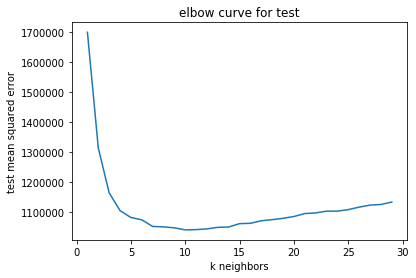

In [134]:
plt.plot(k,test)
plt.xlabel('k neighbors')
plt.ylabel('test mean squared error')
plt.title('elbow curve for test')

In [135]:
d = {'k': k,'test' : test}
d = pd.DataFrame(d)
d.sort_values(by=['test'])

,k,test
9,10,1.039984e+06
10,11,1.041020e+06
11,12,1.043388e+06
8,9,1.046934e+06
12,13,1.048615e+06
13,14,1.049777e+06
7,8,1.050139e+06
6,7,1.051639e+06
14,15,1.060891e+06
15,16,1.062096e+06


In [136]:
reg = KNN(n_neighbors = 10) #creating instance of KNN and selecting that k value which results in minimum test error
reg.fit(train_X,train_y) #fitting over the TRAIN data
test_predict = reg.predict(test_X) #predicting over the test set and calculate mse(over test data)
k = mse(test_predict, test_y)
print('Test MSE ',k)

Test MSE  1039983.6155808403


### Cross validation - used in for KNN model

#### we have seen and used both train and test set, what if we get an unseen data, will our model still be able to perform that well??? In order to check that we create a cross validation, A common practice in data science competitions is to iterate over various models to find a better performing model. However, it becomes difficult to distinguish whether this improvement in score is coming because we are capturing the relationship better, or we are just over-fitting the data(just good on training set and performs poorly on any unseen data). To find the right answer for this question, we use validation techniques. This method helps us in achieving more generalized relationships. Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it.

In [138]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 3), X = train_X, y = train_y, cv = 10)
score

array([0.39802593, 0.36238842, 0.36786355, 0.34678565, 0.45061277,
       0.38596081, 0.43657498, 0.41153143, 0.4109381 , 0.34696347])

In [139]:
# Consistency using Mean and standard deviation in percentage -#mean should be high and std. deviation low for a better model
score.mean()*100, score.std()*100

(39.176451134619505, 3.4302746620783773)

In [140]:
def Val_score(n_neighbors): #just automating the process for different k neighbors(n neighbors value)
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = train_X, y = train_y, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [141]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

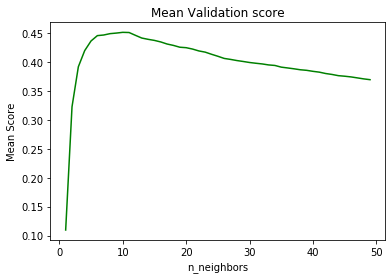

In [142]:
plt.plot(n_neighbors, mean, color = 'green', label = 'mean' ) #plotting mean validation score for each k value
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score') #in below curve we see that mean score is high when n_neighbors is between(0-10),so lets chck

Text(0.5, 1.0, 'Mean Validation score')

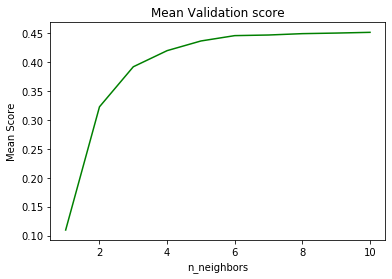

In [145]:
plt.plot(n_neighbors[0:10], mean[0:10], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

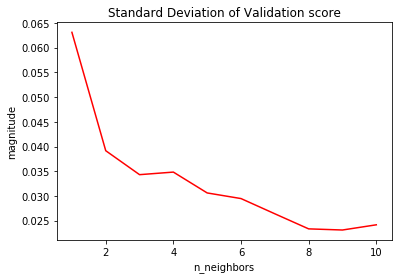

In [146]:
plt.plot(n_neighbors[0:10], std[0:10], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')  ##plotting std. deviation validation score for each k value
plt.ylabel('magnitude') #above we got 0-10 giving high mean score,and out of it frm the plt above n_neighbor = 8 seemsto b best
plt.title('Standard Deviation of Validation score')#n_neighbor = 8, has high mean score and less std dev which is very GOOD

In [147]:
score = cross_val_score( KNN(n_neighbors = 8), X = train_X, y = train_y, cv = 10)
score

array([0.45382537, 0.4188698 , 0.43072856, 0.41579041, 0.49871631,
       0.45290867, 0.47034198, 0.45515255, 0.45324485, 0.44010521])

In [148]:
# Consistency using Mean and standard deviation in percentage -#mean should be high and std. deviation low for a better model
score.mean()*100, score.std()*100

(44.89683713854647, 2.3335132726647245)

In [150]:
reg = KNN(n_neighbors = 8 ) #now lets check the performance on the test set or trying optimum model over test set
reg.fit(train_X, train_y)

score1 = reg.score(train_X, train_y)

score = reg.score(test_X, test_y)
score, score1

(0.4353509421327393, 0.5848621352878781)

In [ ]:
#APPLY CROSS VAL ON LINEAR REGREESION AND SEEEEEEE..THEN START WITH DECISION TREE, RANDOM FOREST..ETC

##### IMP --> KNN - fit on train data and predict over test data and LINEAR REGRESSION - fit on train data and predict over train and test data

## Linear Regression

#### 1. Implement Linear Regression(since it is a regression problem) 

In [111]:
from sklearn.linear_model import LinearRegression as LR #imported requ. library
from sklearn.metrics import mean_absolute_error as mae

In [112]:
lr = LR() #creating an instance of it
lr.fit(train_X,train_y) #fitting ove the TRAIN data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
train_predict = lr.predict(train_X)    # predicting over train data first and calculate mae(over train data)
k = mae(train_predict,train_y)
print('Training Mean absolute error', k)

Training Mean absolute error 853.6089454725252


In [114]:
test_predict = lr.predict(test_X)  # predicting over test data first and calculate mae(over test data)
k = mae(test_predict,test_y)
print('Test Mean absolute error', k)

Test Mean absolute error 853.1575470196949


#### 2. Parameters of Linear Regression - mae, r2,adj_r2,lr.coef_,lr.intercept_

In [115]:
from math import sqrt                   #first by MAE
mae = mae(test_y,test_predict)    
from sklearn.metrics import r2_score
r2 = r2_score(test_y, test_predict)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

mae, r2, adj_r2,  lr.coef_, lr.intercept_

(853.1575470196949,
 0.3586958061921437,
 0.3578669557477909,
 array([-1.48639052e+01,  6.52770026e-01,  2.92886165e+01, -1.31650603e+03,
         3.95835497e+00,  1.17936970e+01,  2.04861619e+02,  7.08236657e+00,
        -2.12158398e+02,  2.28419335e+02,  2.28419335e+02]),
 -15075.319845359265)

In [116]:
from sklearn.metrics import mean_squared_error            #SECOND BY RMSE
rmse = sqrt(mean_squared_error(test_y, test_predict))
from sklearn.metrics import r2_score
r2 = r2_score(test_y, test_predict)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2, lr.coef_, lr.intercept_

(1092.109430328695,
 0.3586958061921437,
 0.3578669557477909,
 array([-1.48639052e+01,  6.52770026e-01,  2.92886165e+01, -1.31650603e+03,
         3.95835497e+00,  1.17936970e+01,  2.04861619e+02,  7.08236657e+00,
        -2.12158398e+02,  2.28419335e+02,  2.28419335e+02]),
 -15075.319845359265)

In [117]:
# sns.scatterplot(test_y,test_predict)

#### 3. Checking assumptions of Linear Models (optional steps)

##### a). HOMOSCEDASTICITY - checking by plotting a residual/error curve(there should be a constant variance of the residuals/error, THERE
##### SHOULD BE NO TREND(INCREASING/DECREASING ETC..) - use scatter plot for it

In [118]:
residuals = pd.DataFrame({'actual value':test_y,'predicted value':test_predict}) #first define the residuals
residuals['residuals'] = residuals['actual value'] - residuals['predicted value']
residuals.head()

,actual value,predicted value,residuals
2172,697.7584,1734.230311,-1036.471911
6228,1414.1592,1644.482127,-230.322927
2404,3078.6592,1763.978316,1314.680884
99,1314.2892,2415.123827,-1100.834627
4945,1403.5064,1328.583363,74.923037


In [119]:
# plt.figure(figsize = (10,6), dpi = 120, facecolor = 'w', edgecolor = 'b')
# f = range(0,2131)
# k = [0 for i in range(0,2131)]
# plt.scatter(f,residuals.residuals[:],label='residuals')
# plt.xlabel('fitted points')
# plt.ylabel('residuals')
# plt.plot(f,k,color = 'red',label = 'regression line')
# plt.title('Residual plot')
# plt.ylim(-4000,4000)
# plt.legend()

##### Conclusion of above plot - There is no constant variance of residuals, no pattern identified, no correlation between residuals --- GOOD SIGN

##### b). should follow NORMAL DISTRIBUTION -- Checking distribution of Residuals - use histogram and Q-Q Plot for it

In [120]:
# plt.figure(figsize = (10,6), dpi = 120,facecolor = 'w', edgecolor = 'b')   #plotting a histogram
# plt.hist(residuals.residuals,bins =150)
# plt.xlabel('Error')
# plt.ylabel('frequency')
# plt.title('Distribution of Error terms')
# plt.show()

##### Above plot --According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors.

In [121]:
# from statsmodels.graphics.gofplots import qqplot  #plotting a q-q plot
# fig,ax = plt.subplots(figsize =(5,5),dpi = 120)
# qqplot(residuals.residuals,line = 's', ax=ax)     #residuals.residuals = blue line(error) and line ='s'(red line)      
# plt.ylabel('Residuals Quantiles')
# plt.title('checking distribution of residual error')
# plt.xlabel('Ideal scale quantiles')
# plt.show()

##### Above plot -- the error is not deviating much from the red line so it means it follows a normal distribution with less outliers and its  GOOD SIGN

##### c). MULTICOLLINEARITY - the degree by which independent variable are dependent on each other. Should be AS LESS AS POSSIBLE. Detected by calculating VIF(variance inflation factor), if VIF >5 or if VIF is high, then multicollinearity is high ( some independent variables re co-related with each other, WHICH ISN'T GOOD as it would be difficult to interpret the outcome of model)

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  #just importing VIF func from statsmodel
from statsmodels.tools.tools import add_constant

In [123]:
VIF = pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index = data.columns)
VIF   #if we have vif>5, then simple drop it

Item_Identifier                   1.004281
Item_Weight                       1.003250
Item_Fat_Content                  1.016528
Item_Visibility                   1.014567
Item_Type                         1.016459
Item_MRP                          1.444245
Outlet_Identifier                 2.401024
Outlet_Establishment_Year         1.095218
Outlet_Size                       1.713457
Outlet_Location_Type         317786.440777
Outlet_Type                  117625.686146
Item_Outlet_Sales                 1.633309
dtype: float64

In [124]:
VIF = VIF[VIF <= 5]   #kept all the values where vif <=5 and in the process any value of vif>5, got deleted on it own
VIF

Item_Identifier              1.004281
Item_Weight                  1.003250
Item_Fat_Content             1.016528
Item_Visibility              1.014567
Item_Type                    1.016459
Item_MRP                     1.444245
Outlet_Identifier            2.401024
Outlet_Establishment_Year    1.095218
Outlet_Size                  1.713457
Item_Outlet_Sales            1.633309
dtype: float64

#### Now if have calculated VIF(by removing two usless feature which has VIF >5) , so lets check if adjusted r2 has varied or not

In [125]:
from sklearn.linear_model import LinearRegression as LR #imported requ. library
from sklearn.metrics import mean_absolute_error as mae

In [126]:
from math import sqrt                   #first by MAE
mae = mae(test_y,test_predict)    
from sklearn.metrics import r2_score
r2 = r2_score(test_y, test_predict)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

mae, r2, adj_r2,  lr.coef_, lr.intercept_

(853.1575470196949,
 0.3586958061921437,
 0.3578669557477909,
 array([-1.48639052e+01,  6.52770026e-01,  2.92886165e+01, -1.31650603e+03,
         3.95835497e+00,  1.17936970e+01,  2.04861619e+02,  7.08236657e+00,
        -2.12158398e+02,  2.28419335e+02,  2.28419335e+02]),
 -15075.319845359265)

In [127]:
from sklearn.metrics import mean_squared_error            #SECOND BY RMSE
rmse = sqrt(mean_squared_error(test_y, test_predict))
from sklearn.metrics import r2_score
r2 = r2_score(test_y, test_predict)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2, lr.coef_, lr.intercept_

(1092.109430328695,
 0.3586958061921437,
 0.3578669557477909,
 array([-1.48639052e+01,  6.52770026e-01,  2.92886165e+01, -1.31650603e+03,
         3.95835497e+00,  1.17936970e+01,  2.04861619e+02,  7.08236657e+00,
        -2.12158398e+02,  2.28419335e+02,  2.28419335e+02]),
 -15075.319845359265)

##### 4. Model interpretability - NOTEBOOK ANALYTICS VIDYA (OPTIONAL)- FOR NORMALIZING AND REPEATING ALL THE STEPS AGAIN

### Feature Selection - can check and see if we get better result because here after feature selection MSE rised

In [88]:
# import seaborn as sns                    
# #get correlations of each features in dataset
# corrmat = data.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [89]:
# from sklearn.linear_model import Lasso
# from sklearn.feature_selection import SelectFromModel

##### 1. first working on train_X and train_y

In [90]:
# sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
# sel_.fit(train_X,train_y)

In [91]:
# sel_.get_support()

In [92]:
# # let's print the number of total and selected features

# # this is how we can make a list of the selected features
# selected_feat = train_X.columns[(sel_.get_support())]

# # let's print some stats
# print('total features: {}'.format((train_X.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#     np.sum(sel_.estimator_.coef_ == 0)))

In [93]:
# selected_feat

In [94]:
# data.head()

In [95]:
# train_X=train_X[selected_feat]

In [96]:
# train_X.head()   #same apply on the test data too, that is test_X

##### 2. Secondly working on test_y and test_y 

In [97]:
# sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
# sel_.fit(test_X,test_y)

In [98]:
# sel_.get_support()

In [99]:
# # let's print the number of total and selected features

# # this is how we can make a list of the selected features
# selected_feat = test_X.columns[(sel_.get_support())]

# # let's print some stats
# print('total features: {}'.format((test_X.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#     np.sum(sel_.estimator_.coef_ == 0)))

In [100]:
# selected_feat

In [101]:
# test_X=test_X[selected_feat]

In [102]:
# test_X.head()